# Tutorial 12: Calculating a stray field using an airbox method

> Interactive online tutorial:
> [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/ubermag/oommfc/master?filepath=docs%2Fipynb%2Findex.ipynb)

In order to calculate the stray field outside the sample, we have to define an "airbox" which is going to contain our sample. In this example we define a box with 100 nm edgle length as a mesh which then contains a magnetic sample which is a cube with 50 nm dimensions. We achieve this by implementing a Python fuction for defining the Ms (`norm_fun`). Outside our sample the value of saturation magnetisation is zero.

In [1]:
import discretisedfield as df
import oommfc as oc
%matplotlib inline

mesh = oc.Mesh(p1=(-100e-9, -100e-9, -100e-9), p2=(100e-9, 100e-9, 100e-9), cell=(5e-9, 5e-9, 5e-9))

def norm_fun(pos):
    x, y, z = pos
    if -50e-9 <= x <= 50e-9 and -50e-9 <= y <= 50e-9 and -50e-9 <= z <= 50e-9:
        return 8e5
    else:
        return 0

system = oc.System(name='airbox_method')
system.hamiltonian = oc.Exchange(A=1e-12) + oc.Demag()
system.dynamics = oc.Precession(gamma=oc.consts.gamma0) + oc.Damping(alpha=1)
system.m = df.Field(mesh, value=(0, 0, 1), norm=norm_fun)

We can now plot the norm to confirm our definition.

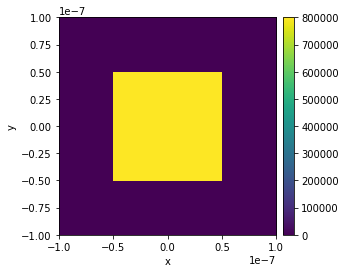

In [2]:
system.m.norm.plane('z').mpl()

In the next step, we can relax the system and show its magnetisation.

2019/11/12 14:36: Running OOMMF (airbox_method.mif) ... (9.6 s)


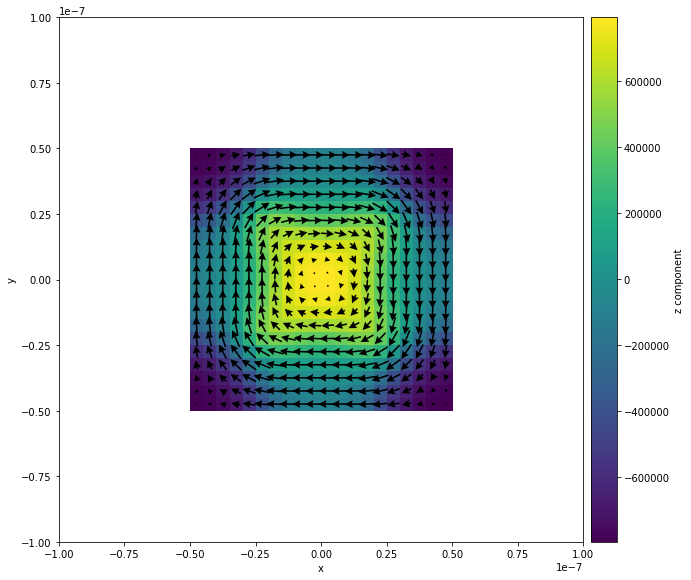

In [3]:
md=oc.MinDriver()
md.drive(system)

system.m.plane('z').mpl(figsize=(10, 10))

Stray field can now be calculated as an effective field for the demagnetisation energy.

In [4]:
stray_field = system.hamiltonian.demag.effective_field

2019/11/12 14:36: Running OOMMF (airbox_method.mif) ... (1.3 s)


`stray_field` is a `df.Field` and all operations characteristic to vector fields can be performed.

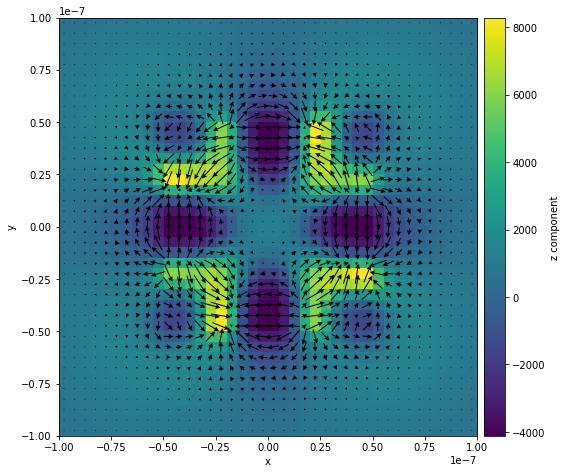

In [5]:
stray_field.plane('z').mpl(figsize=(8, 8))

In [6]:
system.delete()

## Other

More details on various functionality can be found in the [API Reference](https://oommfc.readthedocs.io/en/latest/).